# LAB 5 - Linear Discriminant Analysis & Logistic Regression

In this lab, we will talk about LDA model, and compare the results with logistic regression model.

## 1. Linear Discriminant Analysis

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from sklearn.model_selection import train_test_split

### 1.1 Import Data

In [3]:
path = os.getcwd() + "/customerchurn.csv"
churn = pd.read_csv(path)
churn.info()
churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            7032 non-null   int64  
 1   MonthlyCharges   7032 non-null   float64
 2   SeniorCitizen    7032 non-null   int64  
 3   PaymentMethod    7032 non-null   object 
 4   InternetService  7032 non-null   object 
 5   tenure           7032 non-null   int64  
 6   Contract         7032 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 384.7+ KB


,Churn,MonthlyCharges,SeniorCitizen,PaymentMethod,InternetService,tenure,Contract
0,0,29.85,0,Electronic check,DSL,1,Month-to-month
1,0,56.95,0,Mailed check,DSL,34,One year
2,1,53.85,0,Mailed check,DSL,2,Month-to-month
3,0,42.30,0,Bank transfer,DSL,45,One year
4,1,70.70,0,Electronic check,Fiber optic,2,Month-to-month


In [4]:
churn['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

#### See each class for categorical variables.

In [5]:
churn['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [6]:
churn['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

### 1.2 Train Test Split

In [7]:
churn_train, churn_test = train_test_split(churn, test_size=0.3, random_state=88)
churn_train.shape, churn_test.shape

((4922, 7), (2110, 7))

In [8]:
y_train = churn_train['Churn']
X_train = churn_train.drop(['Churn'], axis=1)

y_test = churn_test['Churn']
X_test = churn_test.drop(['Churn'], axis=1)

In [9]:
X_train

,MonthlyCharges,SeniorCitizen,PaymentMethod,InternetService,tenure,Contract
5224,101.15,0,Electronic check,Fiber optic,8,Month-to-month
3321,70.15,1,Credit card,DSL,38,One year
6427,79.60,0,Bank transfer,DSL,70,Two year
4061,19.50,0,Mailed check,No,14,One year
473,53.60,0,Mailed check,DSL,24,Month-to-month
...,...,...,...,...,...,...
362,50.30,0,Credit card,DSL,58,One year
2481,90.45,0,Electronic check,Fiber optic,28,One year
4047,56.25,1,Electronic check,DSL,34,Month-to-month
6432,55.35,0,Credit card,DSL,17,Month-to-month


### 1.3 Data Processing

In [10]:
from sklearn.preprocessing import OneHotEncoder
## Another approach for creating dummy varaible: OneHotEncoder.

drop_enc = OneHotEncoder(drop='first').fit(X_train[['PaymentMethod','InternetService','Contract']])
print(drop_enc.categories_)

[array(['Bank transfer', 'Credit card', 'Electronic check', 'Mailed check'],
      dtype=object), array(['DSL', 'Fiber optic', 'No'], dtype=object), array(['Month-to-month', 'One year', 'Two year'], dtype=object)]


In [11]:
# Perform the transformation for both the training and the test set.

X_train_categorical = drop_enc.transform(X_train[['PaymentMethod','InternetService','Contract']]).toarray()
X_train_numerical = X_train[['MonthlyCharges','SeniorCitizen','tenure']].values

# combine the numerical variables and the one-hot encoded categorical variables
X_train_transformed = np.concatenate((X_train_numerical,X_train_categorical), axis = 1)

X_test_categorical = drop_enc.transform(X_test[['PaymentMethod','InternetService','Contract']]).toarray()
X_test_numerical = X_test[['MonthlyCharges','SeniorCitizen','tenure']].values
X_test_transformed = np.concatenate((X_test_numerical,X_test_categorical), axis = 1)

X_train_transformed

array([[101.15,   0.  ,   8.  , ...,   0.  ,   0.  ,   0.  ],
       [ 70.15,   1.  ,  38.  , ...,   0.  ,   1.  ,   0.  ],
       [ 79.6 ,   0.  ,  70.  , ...,   0.  ,   0.  ,   1.  ],
       ...,
       [ 56.25,   1.  ,  34.  , ...,   0.  ,   0.  ,   0.  ],
       [ 55.35,   0.  ,  17.  , ...,   0.  ,   0.  ,   0.  ],
       [ 20.1 ,   0.  ,  31.  , ...,   1.  ,   1.  ,   0.  ]])

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_transformed, y_train)

LinearDiscriminantAnalysis()

In [13]:
y_prob_lda = lda.predict_proba(X_test_transformed)
y_pred_lda = pd.Series([1 if x > 1/3 else 0 for x in y_prob_lda[:,1]])

In [14]:
y_prob_lda[:,1]

array([0.81478453, 0.62121829, 0.71989943, ..., 0.0652323 , 0.52725776,
       0.17703029])

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lda)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_lda))

Confusion Matrix: 
 [[1240  302]
 [ 180  388]]

Accuracy: 0.771563981042654


### 1.4 Compare the results with logistics regression.

In [16]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [17]:
import statsmodels.formula.api as smf

In [18]:
logreg = smf.logit(formula = 'Churn ~ MonthlyCharges + SeniorCitizen + PaymentMethod + InternetService + tenure + Contract',
                       data = churn_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.421913
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4911
Method:                           MLE   Df Model:                           10
Date:                Fri, 23 Sep 2022   Pseudo R-squ.:                  0.2695
Time:                        12:21:35   Log-Likelihood:                -2076.7
converged:                       True   LL-Null:                       -2842.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.8982      0.213     -4

In [19]:
y_test = churn_test['Churn']
y_prob = logreg.predict(churn_test)
y_pred = pd.Series([1 if x > 1/3 else 0 for x in y_prob], index=y_prob.index)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[1213  329]
 [ 159  409]]


## 2. ROC Curve

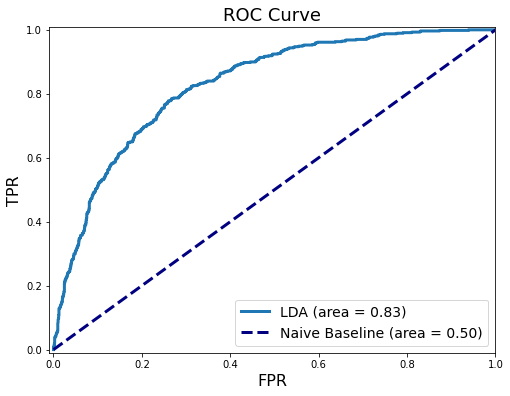

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda[:,1])
roc_auc_lda = auc(fpr_lda, tpr_lda)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])

plt.plot(fpr_lda, tpr_lda, lw=3, label='LDA (area = {:0.2f})'.format(roc_auc_lda))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')

plt.legend(loc='lower right', fontsize=14)
plt.show()

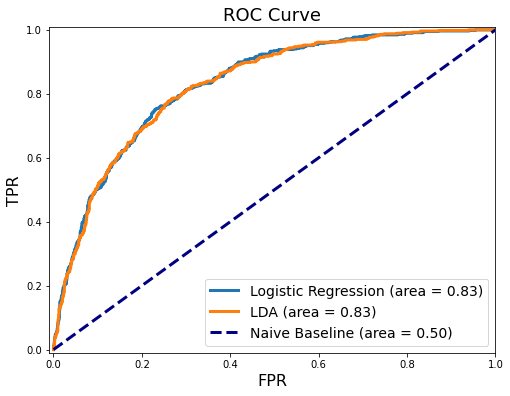

In [21]:
## Add the ROC of Logistics Regression results to compare.

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])

plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot(fpr_lda, tpr_lda, lw=3, label='LDA (area = {:0.2f})'.format(roc_auc_lda))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')

plt.legend(loc='lower right', fontsize=14)
plt.show()

## 3. LDA with multiple classes.

In [22]:
from sklearn import datasets

In [23]:
# load iris dataset and transform into dataframe.
iris = datasets.load_iris()

iris_df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
iris_df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target']

In [24]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   s_length  150 non-null    float64
 1   s_width   150 non-null    float64
 2   p_length  150 non-null    float64
 3   p_width   150 non-null    float64
 4   target    150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [25]:
iris_df['target'].nunique()

3

In [26]:
## split the data.
iris_train, iris_test = train_test_split(iris_df, test_size=0.3, random_state=88)
iris_train.shape, iris_test.shape

((105, 5), (45, 5))

In [27]:
iris_train_X = iris_train[['s_length', 's_width', 'p_length', 'p_width']]
iris_train_y = iris_train['target']

iris_test_X = iris_test[['s_length', 's_width', 'p_length', 'p_width']]
iris_test_y = iris_test['target']

In [28]:
lda_iris = LinearDiscriminantAnalysis()
lda_iris.fit(iris_train_X,iris_train_y)

LinearDiscriminantAnalysis()

In [29]:
data_plot = lda_iris.fit(iris_train_X, iris_train_y ).transform(iris_train_X)

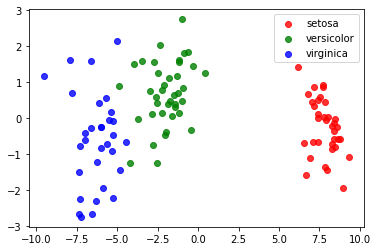

In [30]:
plt.figure()

## set up the label and color of different classes for plotting.

target_names = iris.target_names
colors = ['red', 'green', 'blue']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[iris_train_y == i, 0], data_plot[iris_train_y == i, 1], alpha=.8, color=color,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

Refrence: https://www.statology.org/linear-discriminant-analysis-in-python/